In [16]:
%pip install pillow matplotlib lxml


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## XML ที่ 1
- กรามน้อย ซี่ที่ 2 ล่างขวา

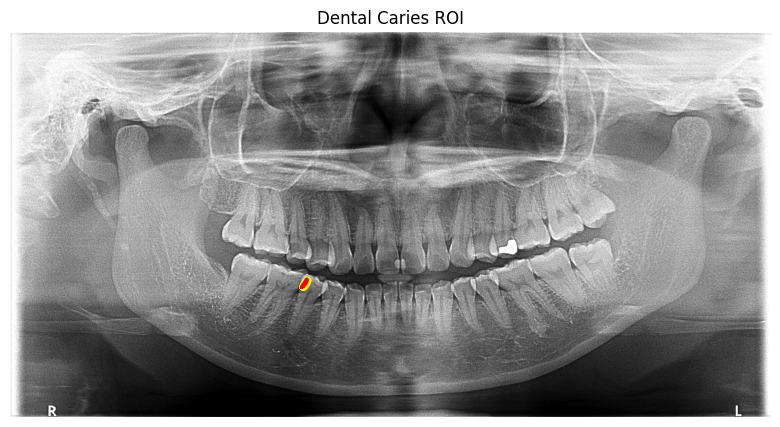

In [17]:
from lxml import etree
from PIL import Image
import matplotlib.pyplot as plt

def try_parse_int(s, default_value=None):
    """
    Attempts to convert a string 's' to an integer.

    Returns the integer if successful, otherwise returns the default_value.
    """
    try:
        # Attempt the conversion
        return int(s)
    except ValueError:
        # If conversion fails (e.g., non-numeric characters), catch the error
        return default_value
    


# -------------------------
# 1) Load image
# -------------------------
img_path = "data/500 cases with annotation-raw/case 1/case_1.png"   # path ไปยังภาพ X-ray
img = Image.open(img_path)

# -------------------------
# 2) Parse XML
# -------------------------
xml_path = "data/500 cases with annotation-raw/case 1/2.25.145886824259023875847707946117030410250.xml"  # path ไปยัง AIM XML
tree = etree.parse(xml_path)
root = tree.getroot()

# namespace ของ AIM (สำคัญมาก ไม่งั้น find ไม่เจอ)
ns = {
    "aim": "gme://caCORE.caCORE/4.4/edu.northwestern.radiology.AIM"
}

# -------------------------
# 3) Extract coordinates
# -------------------------

coords = []


for point in root.findall(
    ".//aim:TwoDimensionSpatialCoordinate",
    namespaces=ns
):

    index = int(point.findall("aim:coordinateIndex", namespaces=ns)[0].get('value'))
    x = float(point.findall("aim:x", namespaces=ns)[0].get('value'))
    y = float(point.findall("aim:y", namespaces=ns)[0].get('value'))
    coords.append((index, x, y))



# -------------------------
# 4) Sort by coordinateIndex
# -------------------------
coords.sort(key=lambda c: c[0])

xs = [c[1] for c in coords]
ys = [c[2] for c in coords]

# ปิด polygon (optional)
xs.append(xs[0])
ys.append(ys[0])

# -------------------------
# 5) Plot
# -------------------------
plt.figure(figsize=(10, 5))
plt.imshow(img, cmap="gray")
plt.plot(xs, ys, "-r", linewidth=2)      # เส้น polygon
plt.scatter(xs, ys, c="yellow", s=10)    # จุด
plt.axis("off")
plt.title("Dental Caries ROI")
plt.show()

## XML ที่ 2

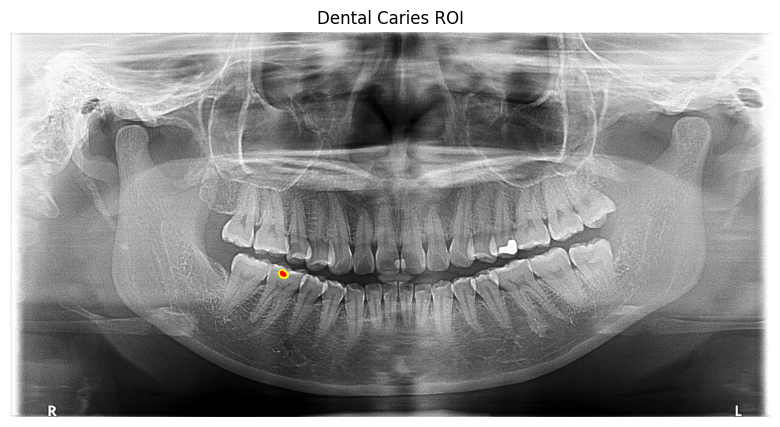

In [18]:
from lxml import etree
from PIL import Image
import matplotlib.pyplot as plt

def try_parse_int(s, default_value=None):
    """
    Attempts to convert a string 's' to an integer.

    Returns the integer if successful, otherwise returns the default_value.
    """
    try:
        # Attempt the conversion
        return int(s)
    except ValueError:
        # If conversion fails (e.g., non-numeric characters), catch the error
        return default_value
    


# -------------------------
# 1) Load image
# -------------------------
img_path = "data/500 cases with annotation-raw/case 1/case_1.png"   # path ไปยังภาพ X-ray
img = Image.open(img_path)

# -------------------------
# 2) Parse XML
# -------------------------
xml_path = "data/500 cases with annotation-raw/case 1/2.25.164465485057628856322314107875344755681.xml"  # path ไปยัง AIM XML
tree = etree.parse(xml_path)
root = tree.getroot()

# namespace ของ AIM (สำคัญมาก ไม่งั้น find ไม่เจอ)
ns = {
    "aim": "gme://caCORE.caCORE/4.4/edu.northwestern.radiology.AIM",
    "iso": "uri:iso.org:21090"  
}

# -------------------------
# 3) Extract coordinates
# -------------------------

coords = []


for point in root.findall(
    ".//aim:TwoDimensionSpatialCoordinate",
    namespaces=ns
):

    index = int(point.findall("aim:coordinateIndex", namespaces=ns)[0].get('value'))
    x = float(point.findall("aim:x", namespaces=ns)[0].get('value'))
    y = float(point.findall("aim:y", namespaces=ns)[0].get('value'))
    coords.append((index, x, y))



# -------------------------
# 4) Sort by coordinateIndex
# -------------------------
coords.sort(key=lambda c: c[0])

xs = [c[1] for c in coords]
ys = [c[2] for c in coords]

# ปิด polygon (optional)
xs.append(xs[0])
ys.append(ys[0])

# -------------------------
# 5) Plot
# -------------------------
plt.figure(figsize=(10, 5))
plt.imshow(img, cmap="gray")
plt.plot(xs, ys, "-r", linewidth=2)      # เส้น polygon
plt.scatter(xs, ys, c="yellow", s=10)    # จุด
plt.axis("off")
plt.title("Dental Caries ROI")
plt.show()

In [19]:
# กำหนดตัวแปรเริ่มต้น
tooth_name_str = "Unknown"
surface_str = "Unknown"

# วนลูปหา Characteristic ทั้งหมดใน XML
for char_element in root.findall(".//aim:ImagingPhysicalEntityCharacteristic", namespaces=ns):
    
    # 1. ดึง Label หรือคำถาม เพื่อดูว่าก้อนนี้คือข้อมูลอะไร
    label_element = char_element.find("aim:label", namespaces=ns)
    if label_element is None:
        continue
        
    label_value = label_element.get("value")
    
    # 2. ตรวจสอบและดึงข้อมูล
    
    # ถ้าคำถามคือ "Anatomical position" -> คำตอบคือ ชื่อฟัน
    if "anatomical position" in label_value.lower():
        type_code = char_element.find("aim:typeCode", namespaces=ns)
        if type_code is not None:
            # ชื่อฟันจะอยู่ใน attribute 'value' ของ tag iso:displayName
            display_name = type_code.find("iso:displayName", namespaces=ns)
            if display_name is not None:
                tooth_name_str = display_name.get("value")

    # ถ้าคำถามคือ "What part... shows the finding" -> คำตอบคือ ด้านที่ผุ
    elif "shows the finding" in label_value.lower():
        type_code = char_element.find("aim:typeCode", namespaces=ns)
        if type_code is not None:
            display_name = type_code.find("iso:displayName", namespaces=ns)
            if display_name is not None:
                surface_str = display_name.get("value")

# ---------------------------------------------------------
# แสดงผลลัพธ์
# ---------------------------------------------------------
print(f"Tooth: {tooth_name_str}")
print(f"Surface: {surface_str}")


fdi_mapping = {
    # บนขวา (Quadrant 1)
    "Permanent upper right central incisor tooth": 11,
    "Permanent upper right lateral incisor tooth": 12,
    "Permanent upper right canine tooth": 13,
    "Permanent upper right first premolar tooth": 14,
    "Permanent upper right second premolar tooth": 15,
    "Permanent upper right first molar tooth": 16,
    "Permanent upper right second molar tooth": 17,
    "Permanent upper right third molar tooth": 18,
    
    # บนซ้าย (Quadrant 2)
    "Permanent upper left central incisor tooth": 21,
    "Permanent upper left lateral incisor tooth": 22,
    "Permanent upper left canine tooth": 23,
    "Permanent upper left first premolar tooth": 24,
    "Permanent upper left second premolar tooth": 25,
    "Permanent upper left first molar tooth": 26,
    "Permanent upper left second molar tooth": 27,
    "Permanent upper left third molar tooth": 28,

    # ล่างซ้าย (Quadrant 3)
    "Permanent lower left central incisor tooth": 31,
    "Permanent lower left lateral incisor tooth": 32,
    "Permanent lower left canine tooth": 33,
    "Permanent lower left first premolar tooth": 34,
    "Permanent lower left second premolar tooth": 35,
    "Permanent lower left first molar tooth": 36,
    "Permanent lower left second molar tooth": 37,
    "Permanent lower left third molar tooth": 38,

    # ล่างขวา (Quadrant 4)
    "Permanent lower right central incisor tooth": 41,
    "Permanent lower right lateral incisor tooth": 42,
    "Permanent lower right canine tooth": 43,
    "Permanent lower right first premolar tooth": 44,
    "Permanent lower right second premolar tooth": 45,
    "Permanent lower right first molar tooth": 46,
    "Permanent lower right second molar tooth": 47,
    "Permanent lower right third molar tooth": 48
}

print("FDI Number:", fdi_mapping.get(tooth_name_str, "Unknown"))

Tooth: Permanent lower right first molar tooth
Surface: Occlusal surface
FDI Number: 46


In [20]:
# from lxml import etree
# from PIL import Image
# import matplotlib.pyplot as plt
# # import from math pot lib sqrt

# def try_parse_int(s, default_value=None):
#     """
#     import math filrm 
#     Attempts to convert a string 's' to an integer.

#     Returns the integer if successful, otherwise returns the default_value.
#     """
#     try:
#         # Attempt the convrjversion

#         # kke fir  agb mp;;t lub fe     
#         # 
#         # 
#         # ow rptompat ;p libw fromskep;le for
#         # 
#         # 
#         # rjefrom ftj       rersion
#         return int(s)
#     except ValueError:
#         # If conversion fails (e.g., non-numeric characters), catch the error
#         return default_value
    
#     fr
#     if  d whelile  d  == 0
#     frkm:
#         elffffrc ofrom len
#         from efptoekvy
        
#         trywv for
#         return 0    
    
# def calculate_distance(x1, y1, x2, y2):

In [21]:
friklk 

NameError: name 'friklk' is not defined